<a href="https://colab.research.google.com/github/KhadafyRafsanjani/StudiIndependent/blob/main/Salinan_dari_RB_4_Activity_CV_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perhatian**
Agar proses running lebih cepat aktifkan **Hardware accelerator "GPU"** pada Google Colab

Pada menu **Runtime** > **Change runtime type** > select *GPU*


<p align="center">
  <a href="url"><img src="https://images.unsplash.com/photo-1507720708252-1ddeb1dbff34?ixlib=rb-1.2.1&auto=format&fit=crop&w=1668&q=80" align="middle" height="383" width="640" ></a>
</p>

# Klasifikasi bunga Dandelion


Di dalam tutorial ini , kamu akan melatih menerapkan pretrained neural network model untuk melakukan image classification bunga dandelion dan rumput. Kita akan menggunakan Framework Deep Learning TensorFlow dan training/validation dataset. 



### Download Dataset

In [1]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true \
    -O /tmp/train.zip

--2022-03-30 09:06:20--  https://github.com/btphan95/simple-cnn/blob/master/train.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/train.zip [following]
--2022-03-30 09:06:20--  https://github.com/btphan95/simple-cnn/raw/master/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip [following]
--2022-03-30 09:06:20--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11

In [2]:
!wget --no-check-certificate \
    https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true \
    -O /tmp/valid.zip

--2022-03-30 09:06:49--  https://github.com/btphan95/simple-cnn/blob/master/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/btphan95/simple-cnn/raw/master/valid.zip [following]
--2022-03-30 09:06:50--  https://github.com/btphan95/simple-cnn/raw/master/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip [following]
--2022-03-30 09:06:50--  https://raw.githubusercontent.com/btphan95/simple-cnn/master/valid.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19

Menggunakan OS library untuk melakukan Operating System libraries, memberikan access ke file system dan zipfile library untuk unzip datanya. 

In [3]:
# Import Library OS/Zipfile
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/valid.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Isi dari .zip di extract ke directory `/tmp/train`, dimana setiap folder berisi subfolder dengan nama `dandelion` dan `rumput`.

Kita menggunakan [ImageGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class untuk membuat secara otomatis dataset train dari directory ini dengan menggunakan subdirectory untuk setiap kelasnya.

Menentukan setiap subdirectory :

In [4]:
# Directory with our training dandelion pictures
train_dandelion_dir = os.path.join('/tmp/train/dandelion')

# Directory with our training grass pictures
train_grass_dir = os.path.join('/tmp/train/grass')

# Directory with our validation dandelion pictures
valid_dandelion_dir = os.path.join('/tmp/valid/dandelion')

# Directory with our validation grass pictures
valid_grass_dir = os.path.join('/tmp/valid/grass')

Melihat seperti apa nama file di training directory `dandelion` dan `rumput` :

In [5]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000318.jpg', '00000163.jpg', '00000077.jpg', '00000002.jpg', '00000126.jpg', '00000485.jpg', '00000075.jpg', '00000244.jpg', '00000148.jpg', '00000281.jpg']
['00000318.jpg', '00000163.jpg', '00000077.jpg', '00000002.jpg', '00000126.jpg', '00000485.jpg', '00000075.jpg', '00000244.jpg', '00000148.jpg', '00000281.jpg']
['00000077.jpg', '00000002.jpg', '00000075.jpg', '00000024.jpg', '00000007.jpg', '00000040.jpg', '00000004.jpg', '00000028.jpg', '00000032.jpg', '00000076.jpg']
['00000002.jpg', '00000024.jpg', '00000007.jpg', '00000040.jpg', '00000004.jpg', '00000028.jpg', '00000032.jpg', '00000025.jpg', '00000006.jpg', '00000046.jpg']


Mencari informasi berapa total images dari dandelion dan rumput di directory :

In [6]:
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training rumput images:', len(os.listdir(train_grass_dir)))
print('total validation dandelion images:', len(os.listdir(valid_dandelion_dir)))
print('total validation rumput images:', len(os.listdir(valid_grass_dir)))

total training dandelion images: 500
total training rumput images: 499
total validation dandelion images: 92
total validation rumput images: 65


# Data Exploration

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Menampilkan 8 batch dari 8 dandelion and 8 rumput pictures :

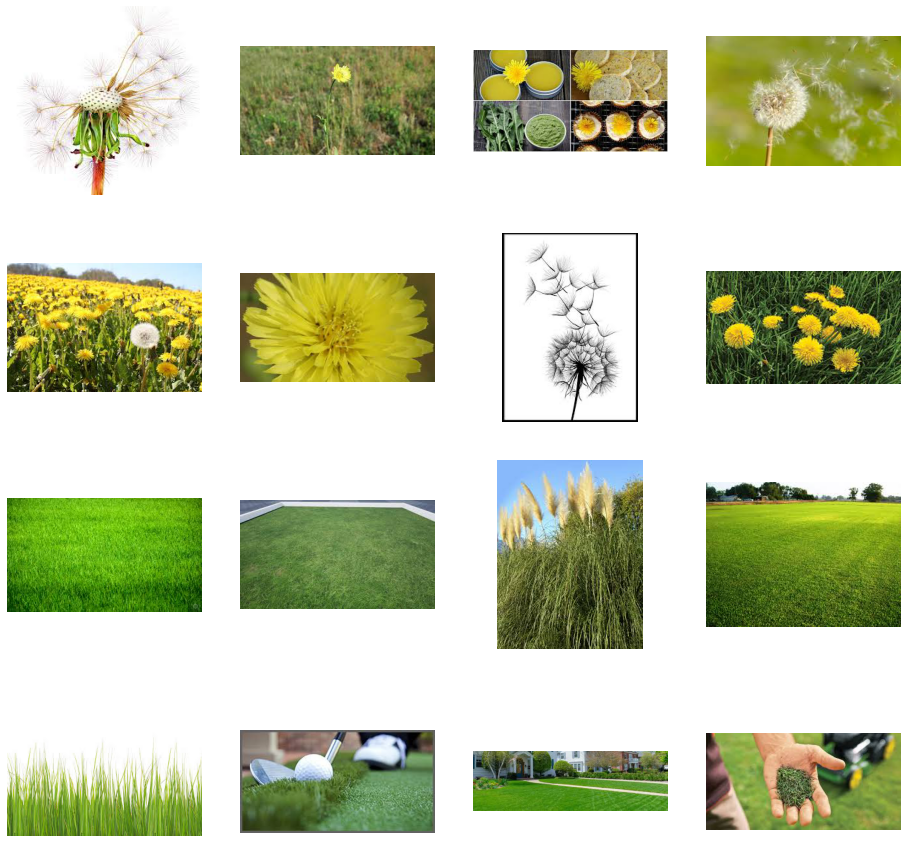

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname) 
                for fname in train_grass_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### Data Preprocessing

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 



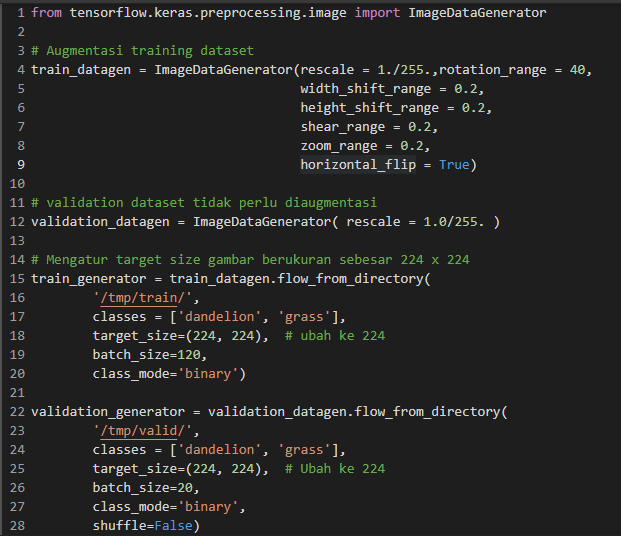

In [9]:
# Ketik code di atas di sini
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi training dataset
train_datagen = ImageDataGenerator (rescale = 1.0/255., rotation_range = 40,
                                    width_shift_range = 8.2, height_shift_range= 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

# validation dataset tidak perlu augmentasi
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Mengatur target size gambar berukuran sebesar 224 x 224 15 
train_generator = train_datagen.flow_from_directory(
          '/tmp/train/',
          classes = ['dandelion', 'grass'],
          target_size=(224, 224), #ubah ke 224 
          batch_size=120,
          class_mode="binary")

validation_generator =  validation_datagen.flow_from_directory(
          '/tmp/valid/',
          classes = ['dandelion', 'grass'], 
          target_size=(224, 224), # Ubah ke 224
          batch_size=20,
          class_mode='binary',
          shuffle=False)

Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


# Membangun arsitektur dari Pre-trained model

**Load model VGG16 dengan ukuran 224 x 224**

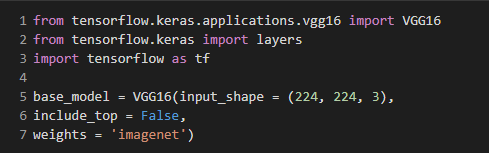

Referensi : [Module Pre-trained Model](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

Referensi : [List API Pre-trained Model](https://keras.io/api/applications/)

Referensi : [Contoh penerapan Pre-trained Model](https://tfhub.dev/)

In [10]:
from tensorflow.keras.applications import vgg16

model = vgg16.VGG16()
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [12]:
# Ketik code di atas di sini
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

base_model = VGG16(input_shape = (224, 224, 3),
                   include_top = False, # menghapus layer terakhir secara otomatis
                   weights = 'imagenet')

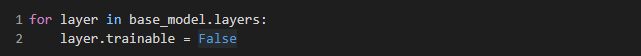

In [13]:
# Ketik code di atas di sini
for layer in base_model.layers: # freezing all layer except the last layer
  layer.trainable = False

**Menyambungkan arsitektur dari Pre-trained model ke Fully connected layer**




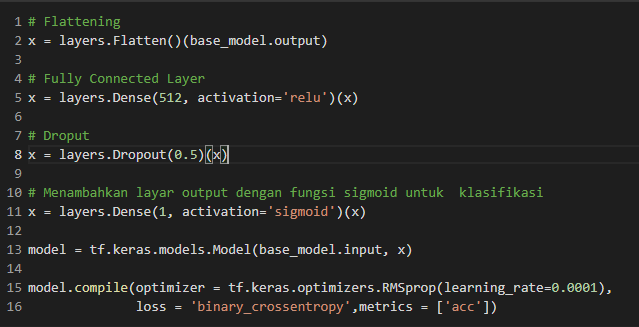

In [14]:
# Flatten
x = layers.Flatten()(base_model.output)

# Fully Connected Layer
x = layers.Dense(512, activation = 'relu')(x)

# Dropout
x = layers.Dropout(0.3)(x)

# Output layer
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy', metrics = ['accuracy'])

# Visualisasi arsitektur jaringan

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

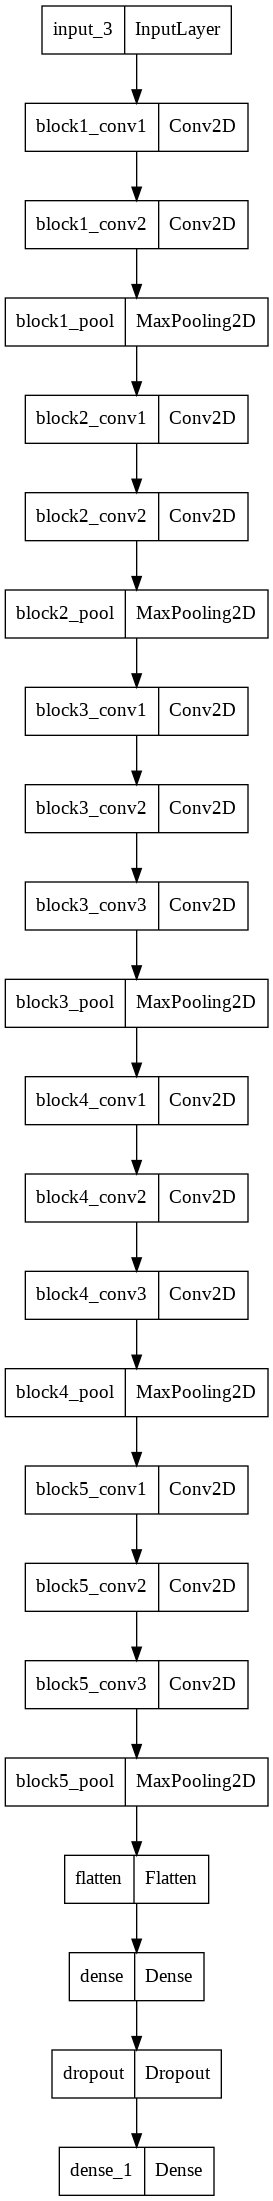

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model)

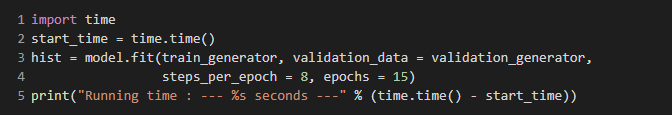

# Train model

In [18]:
# Ketik code di atas di sini
import time
start_time = time.time()
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch = 8, epochs = 5)

print(f"Running time: --- {time.time() - start_time}%s seconds ---")

Epoch 1/5
8/8 [==============================] - 12s 1s/step - loss: 0.4567 - accuracy: 0.7747 - val_loss: 0.4578 - val_accuracy: 0.7962
Epoch 2/5
8/8 [==============================] - 12s 1s/step - loss: 0.3009 - accuracy: 0.8646 - val_loss: 0.7914 - val_accuracy: 0.6879
Epoch 3/5
8/8 [==============================] - 12s 1s/step - loss: 0.3834 - accuracy: 0.8316 - val_loss: 0.5796 - val_accuracy: 0.7452
Epoch 4/5
8/8 [==============================] - 12s 1s/step - loss: 0.3124 - accuracy: 0.8578 - val_loss: 0.4093 - val_accuracy: 0.7643
Epoch 5/5
8/8 [==============================] - 12s 1s/step - loss: 0.2783 - accuracy: 0.8896 - val_loss: 1.0463 - val_accuracy: 0.6688
Running time: --- 95.52283692359924%s seconds ---


## Accuracy, ROC Curve, and AUC

Evaluasi accuracy model:

In [19]:
model.evaluate(validation_generator)

8/8 [==============================] - 1s 112ms/step - loss: 1.0463 - accuracy: 0.6688


[1.0462960004806519, 0.668789803981781]

Kalkulasi ROC curve dan lakukan plotting.



In [20]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

8/8 [==============================] - 1s 117ms/step


Untuk membuat ROC curve dan AUC, kita harus menghitung false-positive rate dan  true-positive rate:

In [21]:
from sklearn.metrics import roc_curve, auc

In [22]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [23]:
roc_auc = auc(fpr, tpr)

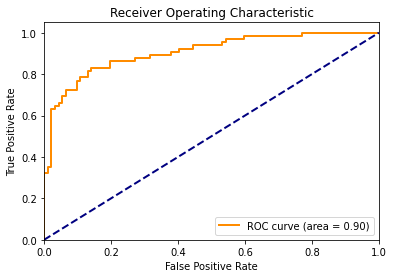

In [24]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

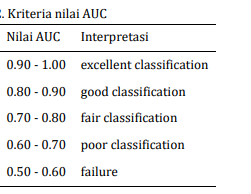

Sumber : https://media.neliti.com/media/publications/113706-ID-penerapan-algoritma-bayesian-regularizat.pdf

In [25]:
model.save('model_3.h5')

ROC curve probabilitas yang memplot tingkat true-positive rate (TPR) terhadap false-positive rate (FPR). 

Demikian pula, AUC (area di bawah kurva), seperti yang ditunjukkan pada legend di atas, mengukur seberapa banyak model untuk mampu membedakan antara dua kelas, dandelion dan rumput. Semakin tinggi AUC, semakin baik model  dalam klasifikasi.

Saving Rumput_HIjau.jpg to Rumput_HIjau.jpg
0
Rumput_HIjau.jpg ini adalah bunga dandelion


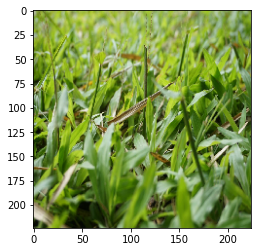

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(x, batch_size=10)
  print(np.argmax(classes))

  if classes[0]<0.5:
    print(fn + " ini adalah bunga dandelion")
  else:
    print(fn + " ini adalah rumput")
 